In [ ]:
!pip install fredapi > /dev/null

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Set style and display options
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Import FRED API key
from fredapi import Fred
fred_key = 'd35d88247a3ad9deccb00da0cd1d89ab'

# 1. Create The Fred Object

In [ ]:
fred = Fred(api_key=fred_key)

# 2. Search for Economic Data



In [ ]:
sp_search = fred.search('S&P', order_by='popularity')

In [ ]:
sp_search.head

<bound method NDFrame.head of                                 id realtime_start realtime_end  \
series id                                                        
BAMLH0A0HYM2          BAMLH0A0HYM2     2024-10-21   2024-10-21   
CSUSHPINSA              CSUSHPINSA     2024-10-21   2024-10-21   
SP500                        SP500     2024-10-21   2024-10-21   
BAMLH0A0HYM2EY      BAMLH0A0HYM2EY     2024-10-21   2024-10-21   
BAMLC0A0CM              BAMLC0A0CM     2024-10-21   2024-10-21   
...                            ...            ...          ...   
DDDI12SMA156NWDB  DDDI12SMA156NWDB     2024-10-21   2024-10-21   
Q03069USQ605NNBR  Q03069USQ605NNBR     2024-10-21   2024-10-21   
CSHICPCZA156NRUG  CSHICPCZA156NRUG     2024-10-21   2024-10-21   
CSHXCPVEA156NRUG  CSHXCPVEA156NRUG     2024-10-21   2024-10-21   
CSHMCPNPA156NRUG  CSHMCPNPA156NRUG     2024-10-21   2024-10-21   

                                                              title  \
series id                                                             
BAMLH0A0HYM2      ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                       S&P 500   
BAMLH0A0HYM2EY         ICE BofA US High Yield Index Effective Yield   
BAMLC0A0CM        ICE BofA US Corporate Index Option-Adjusted Sp...   
...                                                             ...   
DDDI12SMA156NWDB  Private Credit by Deposit Money Banks and Othe...   
Q03069USQ605NNBR  Revenue Freight Tons Originated, Less Than Car...   
CSHICPCZA156NRUG  Share of Gross Capital Formation at Current Pu...   
CSHXCPVEA156NRUG  Share of Merchandise Exports at Current Purcha...   
CSHMCPNPA156NRUG  Share of Merchandise Imports at Current Purcha...   

                 observation_start observation_end     frequency  \
series id                                                          
BAMLH0A0HYM2            1996-12-31      2024-10-17  Daily, Close   
CSUSHPINSA              1987-01-01      2024-07-01       Monthly   
SP500                   2014-10-20      2024-10-18  Daily, Close   
BAMLH0A0HYM2EY          1996-12-31      2024-10-17  Daily, Close   
BAMLC0A0CM              1996-12-31      2024-10-17  Daily, Close   
...                            ...             ...           ...   
DDDI12SMA156NWDB        2001-01-01      2020-01-01        Annual   
Q03069USQ605NNBR        1920-01-01      1943-07-01     Quarterly   
CSHICPCZA156NRUG        1990-01-01      2019-01-01        Annual   
CSHXCPVEA156NRUG        1950-01-01      2019-01-01        Annual   
CSHMCPNPA156NRUG        1960-01-01      2019-01-01        Annual   

                 frequency_short               units         units_short  \
series id                                                                  
BAMLH0A0HYM2                   D             Percent                   %   
CSUSHPINSA                     M  Index Jan 2000=100  Index Jan 2000=100   
SP500                          D               Index               Index   
BAMLH0A0HYM2EY                 D             Percent                   %   
BAMLC0A0CM                     D             Percent                   %   
...                          ...                 ...                 ...   
DDDI12SMA156NWDB               A             Percent                   %   
Q03069USQ605NNBR               Q   Thousands of Tons      Thous. Of Tons   
CSHICPCZA156NRUG               A             Percent                   %   
CSHXCPVEA156NRUG               A             Percent                   %   
CSHMCPNPA156NRUG               A             Percent                   %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
BAMLH0A0HYM2      Not Seasonally Adjusted                       NSA   
CSUSHPINSA        Not Seasonally Adjusted                       NSA   
SP500             Not Seasona

# 3. Pull Raw Data & Plot

In [ ]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

# 4. Pull And Join Multiple Data Series

<Axes: >

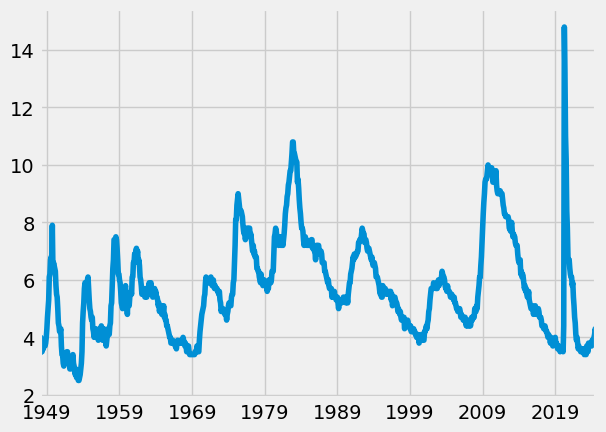

In [9]:
un_emp = fred.search('unemployment')
unrate = fred.get_series('UNRATE')
unrate.plot()
plt.title('National Unemployment Rate')
plt.show()

<Axes: >

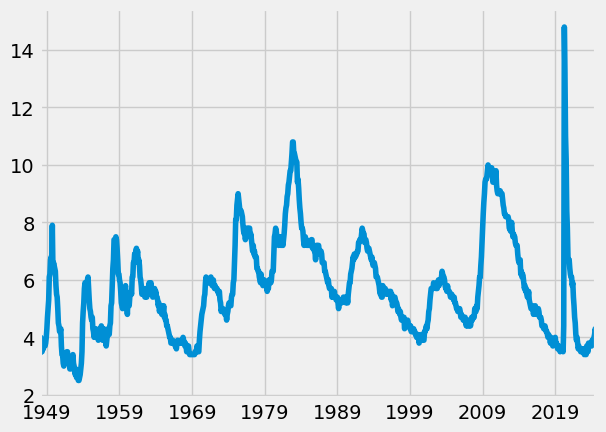

In [ ]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1)  # Avoiding too fast requests to prevent being blocked

uemp_results = pd.concat(all_results, axis=1)

# Dropping unnecessary columns
cols_to_drop = [col for col in uemp_results if len(col) > 4]
uemp_results = uemp_results.drop(columns=cols_to_drop, axis=1)
uemp_states = uemp_results.dropna().copy()

# Converting FRED IDs to state names for clarity
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
uemp_states.columns = [id_to_state.get(c, c) for c in uemp_states.columns]

In [ ]:
# Analyzing unemployment rates in May 2020
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()